# Estación Retiro

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 5]

import warnings
warnings.filterwarnings('ignore')

In [2]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from itertools import product

In [3]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from tqdm import tqdm

In [4]:
df = pd.read_csv("../../data/df_49.csv", index_col=0)
df.index = pd.to_datetime(df.index)

In [5]:
df.head()

,NO2
month,
2013-01-01,37.129032
2013-02-01,28.709677
2013-03-01,24.096774
2013-04-01,21.290323
2013-05-01,20.096774


### Estacionalidad

In [6]:
df2 = df.copy()

In [7]:
df2["año"] = df.index.year
df2["mes"] = df.index.month

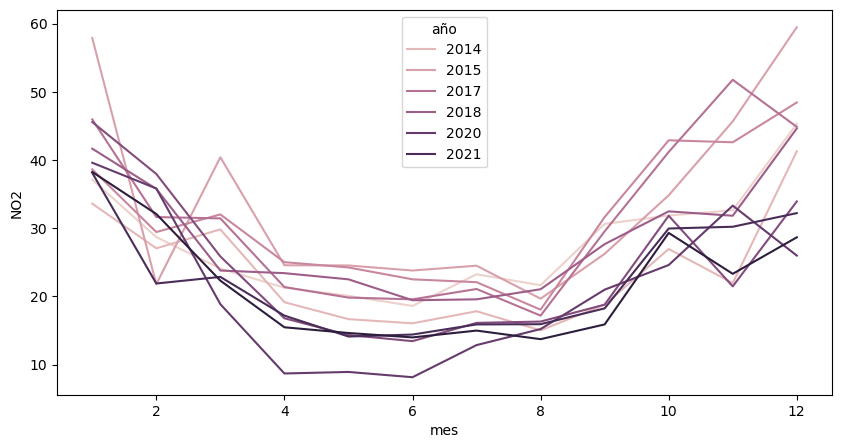

In [8]:
sns.lineplot(x = "mes", y = "NO2", hue = "año", data = df2);

### Estacionaridad

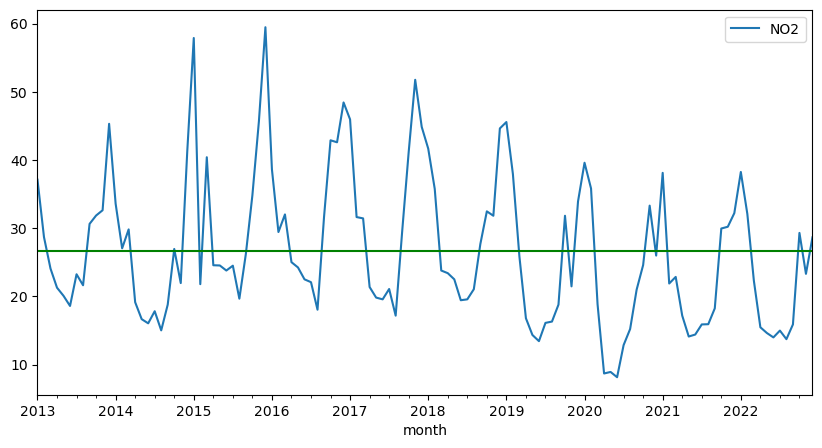

In [9]:
df.plot()
plt.axhline(df.NO2.mean(), c = "g");

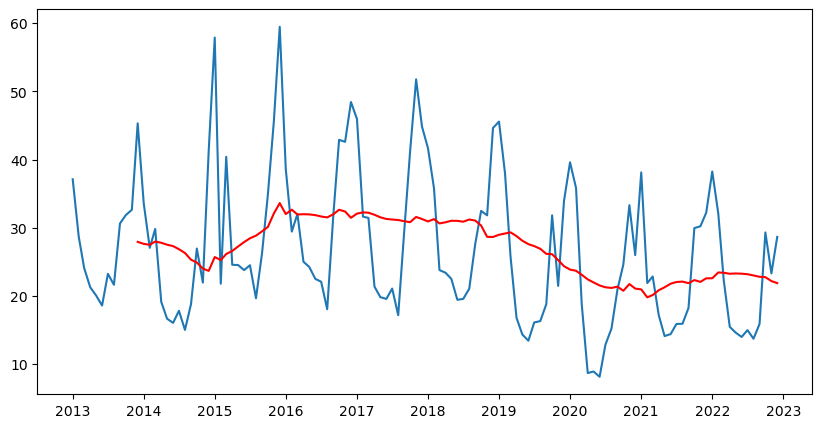

In [10]:
plt.plot(df["NO2"])
plt.plot(df.rolling(window= 12).mean(), c = "r");

In [11]:
df.head()

,NO2
month,
2013-01-01,37.129032
2013-02-01,28.709677
2013-03-01,24.096774
2013-04-01,21.290323
2013-05-01,20.096774


In [12]:
df2.head()

,NO2,año,mes
month,,,
2013-01-01,37.129032,2013,1
2013-02-01,28.709677,2013,2
2013-03-01,24.096774,2013,3
2013-04-01,21.290323,2013,4
2013-05-01,20.096774,2013,5


In [13]:
df3 = df.copy()

In [14]:
df3["year"] = df3.index.year
df3["month"] = df2.index.month
df3.head()

,NO2,year,month
month,,,
2013-01-01,37.129032,2013,1
2013-02-01,28.709677,2013,2
2013-03-01,24.096774,2013,3
2013-04-01,21.290323,2013,4
2013-05-01,20.096774,2013,5


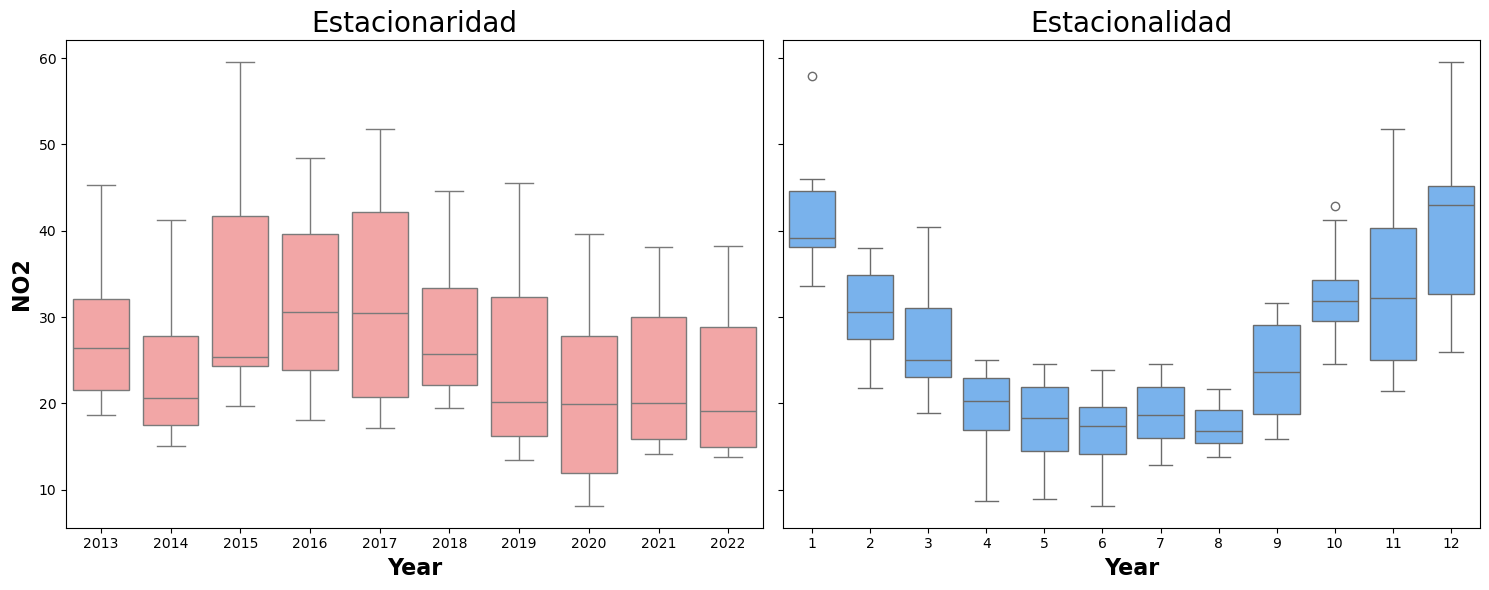

In [15]:
# Nos creamos una lista con las columnas de tiempo
tiempo = df3.columns.drop("NO2")

# Iniciamos los subplots
fig, ax = plt.subplots(nrows=1, ncols=len(tiempo), figsize=(15, 6), sharey=True)

# Nombres personalizados para los títulos
nombres = ["Estacionaridad", "Estacionalidad"]

# Colores bonitos para los boxplots
colores = ["#FF9999", "#66B2FF"]  # Puedes modificar estos códigos de colores

# Hacemos un loop para crear los boxplots para cada año
for i, col in enumerate(tiempo):
    sns.boxplot(data=df3, x=col, y="NO2", ax=ax[i], palette=[colores[i]])
    ax[i].set_title(nombres[i], fontsize=20, loc='center')
    ax[i].set_xlabel('Year', fontsize=16, fontdict=dict(weight='bold'))
    ax[i].set_ylabel('NO2', fontsize=16, fontdict=dict(weight='bold'))

plt.tight_layout()
plt.show()

No hay estacionaridad.

El de estacionalidad estudia todos los eneros, febreros,... de mis años muestra.

La aplicación de la estacionalidad (por ejemplo, a través de un modelo SARIMA con un parámetro estacional) sigue siendo relevante para comprender los patrones recurrentes en tus datos a lo largo del tiempo. Sin embargo, los desplazamientos o irregularidades en la mediana podrían indicar:

Cambios en los patrones estacionales: Las variaciones en la mediana podrían señalar cambios en los patrones estacionales a lo largo del tiempo. Esto puede requerir una exploración adicional para comprender si estas variaciones son anómalas o representan cambios genuinos en la estacionalidad.

Anomalías o eventos atípicos: La presencia de valores atípicos o eventos inusuales en los datos estacionales puede afectar la representación visual de la estacionalidad. Estos eventos pueden causar que la mediana no esté centrada en el boxplot.

En resumen, aunque la mediana desplazada en un boxplot puede indicar cierta variabilidad o cambios en los patrones estacionales, aún puedes aplicar el análisis estacional para comprender los ciclos recurrentes en tus datos. Sin embargo, es importante considerar las posibles anomalías o cambios en los datos que podrían estar afectando la representación visual de la estacionalidad.

### Test de Fuller

In [16]:
res = adfuller(df["NO2"])
res

(-0.5249391665863475,
 0.8870572210058274,
 11,
 108,
 {'1%': -3.4924012594942333,
  '5%': -2.8886968193364835,
  '10%': -2.5812552709190673},
 700.0995501628371)

In [17]:
print("AD Fuller Stats", res[0])
print("p-value", res[1])
print("Critical values")

for k, v in res[4].items():
    print(k, round(v, 2))

AD Fuller Stats -0.5249391665863475
p-value 0.8870572210058274
Critical values
1% -3.49
5% -2.89
10% -2.58


*Datos no estacionarios. Su media y su varianza están en función del tiempo 🍋*

### Autocorrelación

In [18]:
for i in range(49):
    print(f"{i} mes Lag, {df['NO2'].autocorr(lag= i)}")

0 mes Lag, 0.9999999999999998
1 mes Lag, 0.6832010982760768
2 mes Lag, 0.4301273086085179
3 mes Lag, 0.12429970488557517
4 mes Lag, -0.2075361794563742
5 mes Lag, -0.3972556315843646
6 mes Lag, -0.4559116572372424
7 mes Lag, -0.4238041476351783
8 mes Lag, -0.24176662781207658
9 mes Lag, 0.07938395418236988
10 mes Lag, 0.3851846435502156
11 mes Lag, 0.6439048514230666
12 mes Lag, 0.7784433223410983
13 mes Lag, 0.645931938791465
14 mes Lag, 0.37676926283292256
15 mes Lag, 0.10138943960873915
16 mes Lag, -0.223290403366858
17 mes Lag, -0.4353905443150666
18 mes Lag, -0.490463348967912
19 mes Lag, -0.4712356419981421
20 mes Lag, -0.2737995881946239
21 mes Lag, 0.04899423040233369
22 mes Lag, 0.3107078890810844
23 mes Lag, 0.5853209027340955
24 mes Lag, 0.7154343310586648
25 mes Lag, 0.5581178966176413
26 mes Lag, 0.32921255449468034
27 mes Lag, 0.0305190121942728
28 mes Lag, -0.30282710499995574
29 mes Lag, -0.5249372747951639
30 mes Lag, -0.5936862758363174
31 mes Lag, -0.5378496939059639

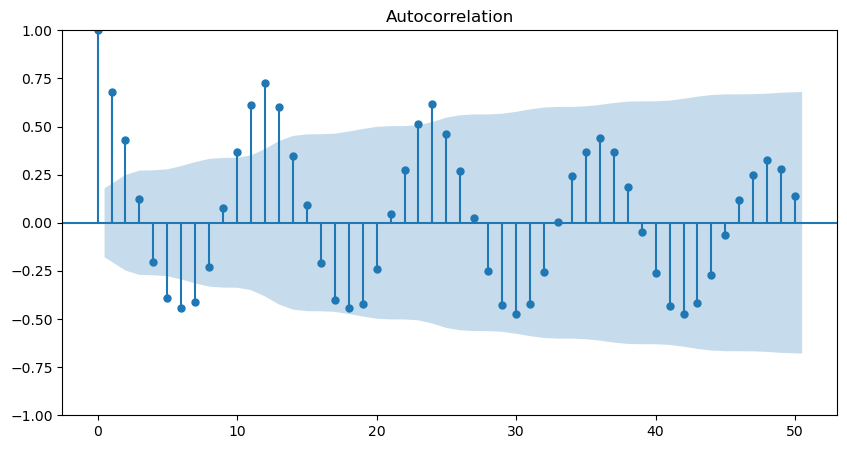

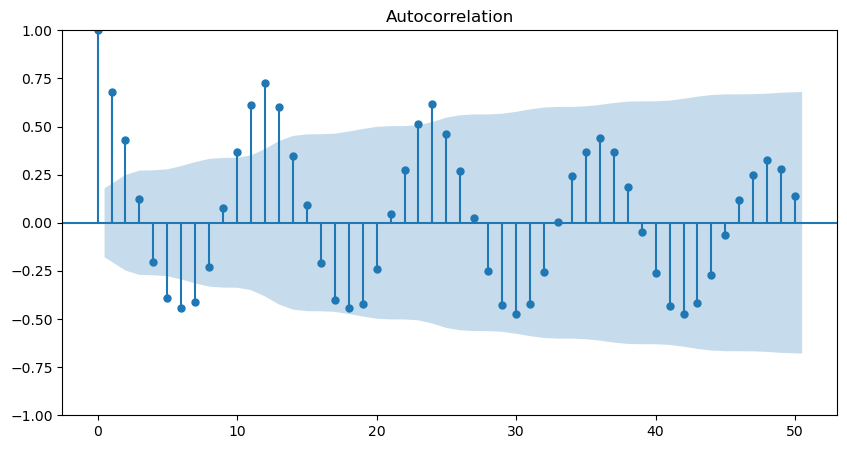

In [19]:
plot_acf(df, lags = 50)

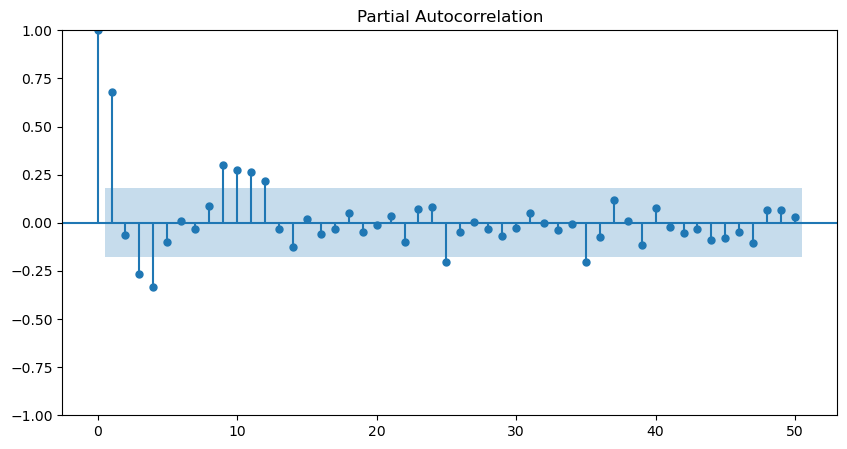

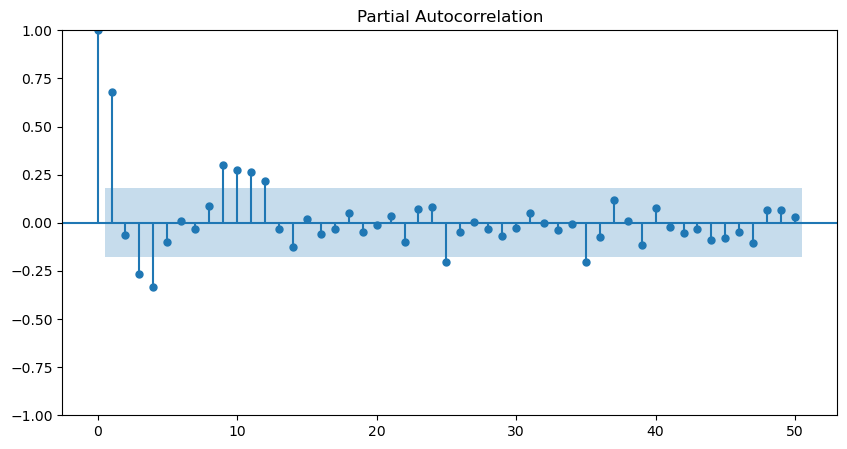

In [20]:
plot_pacf(df, lags = 50)

In [21]:
df.head()

,NO2
month,
2013-01-01,37.129032
2013-02-01,28.709677
2013-03-01,24.096774
2013-04-01,21.290323
2013-05-01,20.096774


In [22]:
df.shape

(120, 1)

In [23]:
df.isnull().sum()

NO2    0
dtype: int64

### SARIMA

In [24]:
y_test = df["NO2"][-30:]
y_train = df["NO2"][:-30]

In [25]:
ps = range(4)
ds = range(1,3)
qs = range(3)

parameters = list(product(ps,ds, qs))
print(parameters)

[(0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2), (3, 1, 0), (3, 1, 1), (3, 1, 2), (3, 2, 0), (3, 2, 1), (3, 2, 2)]


In [26]:
%%time
rmse = []
order = []
for p, d, q in tqdm(parameters):
    try:
        modelo=ARIMA(y_train, order=(p, d, q)).fit()
        pred = modelo.predict(start=len(y_train), end=len(df) -1)
        error = np.sqrt(np.mean(mean_squared_error(y_test, pred)))
        rmse.append(error)
        order.append((p,d, q))
    except: 
        continue

  0%|          | 0/24 [00:00<?, ?it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 62%|██████▎   | 15/24 [00:00<00:00, 25.94it/s]C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packag

CPU times: total: 406 ms
Wall time: 1.09 s


In [27]:
# veamos los resultados de todos los modelos
results = pd.DataFrame({"RMSE": rmse, "order": order})
results.sort_values(by="RMSE", inplace=True)
results.head()

,RMSE,order
8,8.870656,"(1, 1, 2)"
14,12.214573,"(2, 1, 2)"
20,14.632108,"(3, 1, 2)"
2,15.942367,"(0, 1, 2)"
7,15.995980,"(1, 1, 1)"


In [28]:
%%time

modelo=SARIMAX(endog=y_train, 
               exog=None,
               #order=(1, 1, 2),  # modelo arima
               seasonal_order=(1, 1, 2, 12) # modelo sarima, estacionalidad es el último valor
              ).fit(disp=False)
                     
pred=modelo.predict(len(y_train), len(df)-1)  

error=(pred-y_test).abs().sum()/len(pred) 
print ('Error mae: ', error)


res=pd.DataFrame({'real':y_test, 'pred':pred, 'error':pred-y_test})
res

C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\ccior\anaconda3\envs\proyecto\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Error mae:  4.823338586872001
CPU times: total: 297 ms
Wall time: 506 ms


,real,pred,error
2020-07-01,12.870968,16.102341,3.231374
2020-08-01,15.225806,16.948774,1.722967
2020-09-01,21.000000,23.889193,2.889193
2020-10-01,24.612903,33.425632,8.812729
2020-11-01,33.322581,30.995609,-2.326972
2020-12-01,26.000000,41.757087,15.757087
2021-01-01,38.129032,41.629773,3.500741
2021-02-01,21.903226,32.903962,11.000736
2021-03-01,22.870968,25.158004,2.287036
2021-04-01,17.193548,16.578309,-0.615239


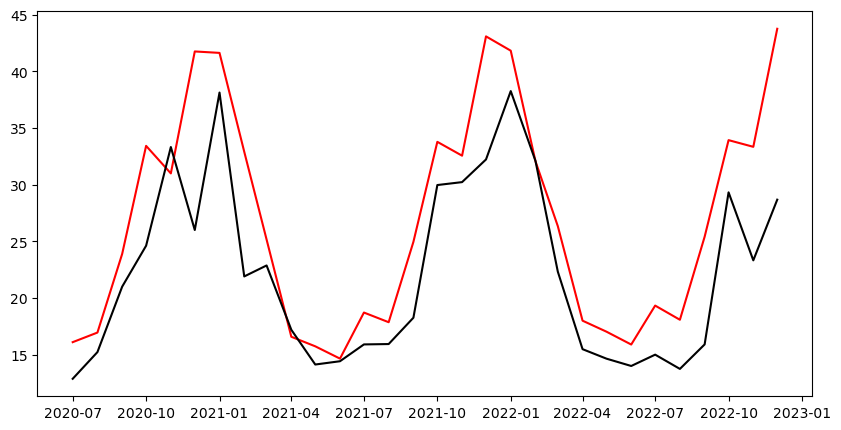

In [29]:
plt.plot(res["pred"], c = "r")
plt.plot(res["real"], c = "black");

In [30]:
pred["real_test"] = y_test

In [31]:
pred_año = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 9))
pred_año

,predicted_mean
2023-01-01,41.920080
2023-02-01,31.635395
2023-03-01,26.938913
2023-04-01,18.717742
2023-05-01,17.681460
2023-06-01,16.524031
2023-07-01,19.641651
2023-08-01,18.187661
2023-09-01,25.635460
2023-10-01,34.006246


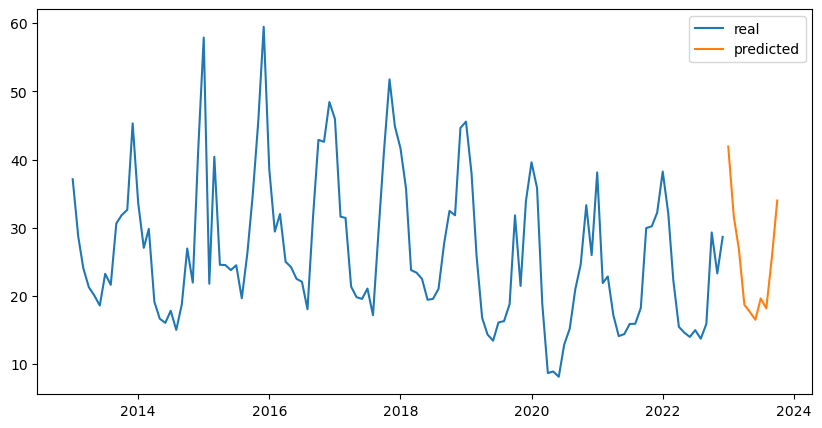

In [32]:
plt.plot(df)
plt.plot(pred_año)
plt.legend(["real", "predicted"]);

In [33]:
pred_año

,predicted_mean
2023-01-01,41.920080
2023-02-01,31.635395
2023-03-01,26.938913
2023-04-01,18.717742
2023-05-01,17.681460
2023-06-01,16.524031
2023-07-01,19.641651
2023-08-01,18.187661
2023-09-01,25.635460
2023-10-01,34.006246


## Datos reales 2023

In [34]:
df23 = pd.read_csv("../../data/emisiones23.csv")

In [35]:
df23.head()

,Unnamed: 0,ESTACION,ANO,MES,NO2
0,0,4,2023,1,32.516129
1,1,4,2023,2,36.741935
2,2,4,2023,3,27.806452
3,3,4,2023,4,22.838710
4,4,4,2023,5,16.612903


### Elijo la estación correspondiente

In [36]:
real = df23[df23["ESTACION"] == 49]
real

,Unnamed: 0,ESTACION,ANO,MES,NO2
148,148,49,2023,1,26.677419
149,149,49,2023,2,29.645161
150,150,49,2023,3,21.838710
151,151,49,2023,4,15.516129
152,152,49,2023,5,12.483871
153,153,49,2023,6,14.645161
154,154,49,2023,7,13.806452
155,155,49,2023,8,11.322581
156,156,49,2023,9,18.419355
157,157,49,2023,10,21.290323


In [37]:
import sys
sys.path.append('../../src')

from clean_support import NO2_clean, estacion_timeseries

In [38]:
estacion_timeseries(real)

,Unnamed: 0,NO2
month,,
2023-01-01,148,26.677419
2023-02-01,149,29.645161
2023-03-01,150,21.838710
2023-04-01,151,15.516129
2023-05-01,152,12.483871
2023-06-01,153,14.645161
2023-07-01,154,13.806452
2023-08-01,155,11.322581
2023-09-01,156,18.419355


In [39]:
real.drop("Unnamed: 0", axis=1, inplace=True)

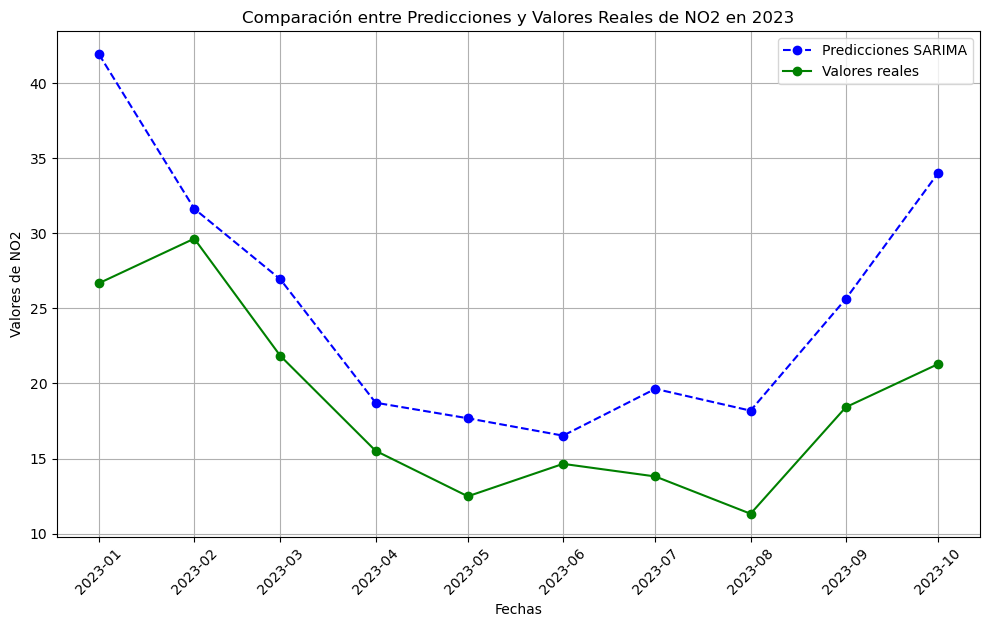

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que pred_año y df_08_23 son tus DataFrames con las predicciones y los valores reales respectivamente
# Asegúrate de tener las fechas como índices y las columnas 'predicted_mean' y 'NO2' disponibles

# Convertir las columnas de fechas a objetos datetime si es necesario
pred_año.index = pd.to_datetime(pred_año.index)
real.index = pd.to_datetime(real.index)

# Filtrar los datos de 2023 para enero a octubre
predicciones_2023 = pred_año['predicted_mean']['2023-01':'2023-10']
valores_reales_2023 = real['NO2']['2023-01':'2023-10']

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(predicciones_2023.index, predicciones_2023, color='blue', label='Predicciones SARIMA', linestyle='--', marker='o')
plt.plot(valores_reales_2023.index, valores_reales_2023, color='green', label='Valores reales', linestyle='-', marker='o')

# Añadir etiquetas, título y leyenda
plt.xlabel('Fechas')
plt.ylabel('Valores de NO2')
plt.title('Comparación entre Predicciones y Valores Reales de NO2 en 2023')
plt.legend()

# Mejorar el diseño
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)  # Rotar las fechas para mayor legibilidad

# Mostrar la gráfica
plt.show()

In [41]:
pred_año["predicted_mean"]
real["NO2"]

month
2023-01-01    26.677419
2023-02-01    29.645161
2023-03-01    21.838710
2023-04-01    15.516129
2023-05-01    12.483871
2023-06-01    14.645161
2023-07-01    13.806452
2023-08-01    11.322581
2023-09-01    18.419355
2023-10-01    21.290323
Freq: MS, Name: NO2, dtype: float64

### Estimación cierre 2023

In [42]:
pred_año_total = pd.DataFrame(modelo.predict(start = len(df), end = len(df) + 11))
pred_año_total

,predicted_mean
2023-01-01,41.920080
2023-02-01,31.635395
2023-03-01,26.938913
2023-04-01,18.717742
2023-05-01,17.681460
2023-06-01,16.524031
2023-07-01,19.641651
2023-08-01,18.187661
2023-09-01,25.635460
2023-10-01,34.006246


In [49]:
# Obtener las dos últimas filas de pred_año_total
ultimas_filas_pred_año = pred_año_total.tail(2)

# Renombrar la columna 'predicted_mean' como 'NO2' en las dos últimas filas
ultimas_filas_pred_año = ultimas_filas_pred_año.rename(columns={'predicted_mean': 'NO2'})

# Añadir las dos últimas filas al final de los datos reales
frames = [real, ultimas_filas_pred_año]
df_extendido = pd.concat(frames)

# Verificar el DataFrame extendido
df_extendido

,NO2
2023-01-01,26.677419
2023-02-01,29.645161
2023-03-01,21.838710
2023-04-01,15.516129
2023-05-01,12.483871
2023-06-01,14.645161
2023-07-01,13.806452
2023-08-01,11.322581
2023-09-01,18.419355
2023-10-01,21.290323


In [61]:
#Corrección valores

ultimas_fechas = df_extendido.index[-2:]  # Obtener las dos últimas fechas

# Acceder a las filas correspondientes a esas fechas
ultimas_filas = df_extendido.loc[ultimas_fechas]

# Multiplicar los valores de la columna 'NO2' por 0.8 en esas filas
ultimas_filas['NO2'] *= 0.8

df_extendido.loc[ultimas_fechas] = ultimas_filas

In [66]:
df_extendido

,NO2
2023-01-01,26.677419
2023-02-01,29.645161
2023-03-01,21.838710
2023-04-01,15.516129
2023-05-01,12.483871
2023-06-01,14.645161
2023-07-01,13.806452
2023-08-01,11.322581
2023-09-01,18.419355
2023-10-01,21.290323


In [67]:
#Corrección valores

ultimas_fechas = df_extendido.index[-2:]  # Obtener las dos últimas fechas

# Acceder a las filas correspondientes a esas fechas
ultimas_filas = df_extendido.loc[ultimas_fechas]

# Multiplicar los valores de la columna 'NO2' por 0.8 en esas filas
ultimas_filas['NO2'] *= 0.8

df_extendido.loc[ultimas_fechas] = ultimas_filas

In [68]:
df_predict23 = df_extendido.mean()
df_predict23

NO2    19.621707
dtype: float64

In [69]:
dff = df_predict23.to_frame()
dff = dff.rename(columns={0: "Retiro"})
dff

,Retiro
NO2,19.621707


In [65]:
dff.to_csv('../../clean_visuals/predicts23/49_Retiro.csv', index=True)